# <span style="color:blue">  Numerical exercises 3</span> Igor Vasiljevic 11191A

## In the following we test a Monte Carlo tecnich in attept to solve the Black-Scholes problem.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

plt.rcParams.update({'font.size': 20})
data = pd.read_csv("../Esercizio3/dati.dat", sep='\t')

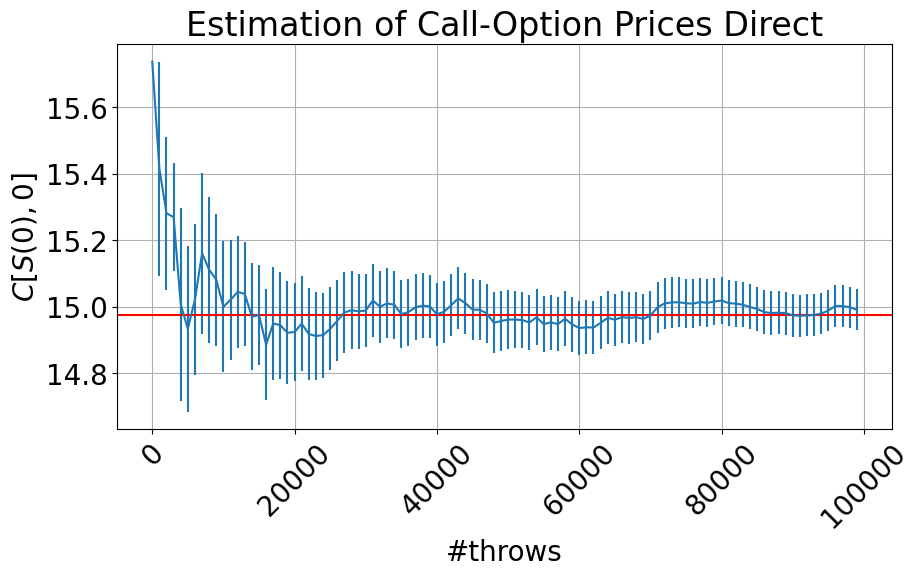

In [14]:
M=100000             # Total number of throws
N=100              # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x1,data["C_Direct"],yerr=data["err_C_Direct"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=14.975790778311286, color='r', linestyle='-') #Black-Scholes analytic solution
plt.title('Estimation of Call-Option Prices Direct')
plt.xlabel('#throws')
plt.ylabel('$C[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

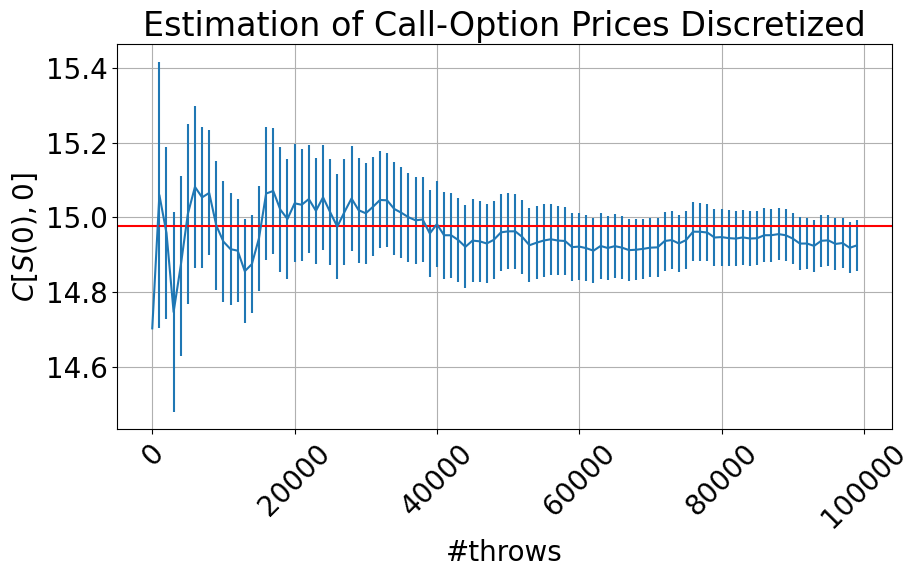

In [15]:
plt.errorbar(x1,data["C_Disc"],yerr=data["err_C_Disc"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=14.975790778311286, color='r', linestyle='-') #Black-Scholes analytic solution
plt.title('Estimation of Call-Option Prices Discretized')
plt.xlabel('#throws')
plt.ylabel('$C[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

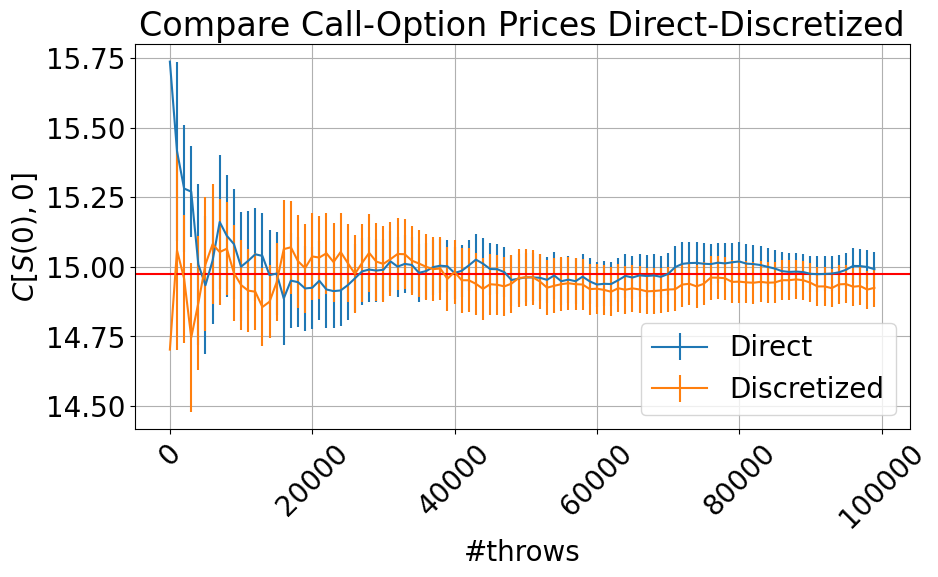

In [16]:
plt.rcParams["figure.figsize"]=(10,5)
plt.errorbar(x1,data["C_Direct"],yerr=data["err_C_Direct"], label="Direct")
plt.errorbar(x1,data["C_Disc"],yerr=data["err_C_Disc"], label="Discretized")
plt.axhline(y=14.975790778311286, color='r', linestyle='-') #Black-Scholes analytic solution
plt.legend(loc="lower right")
plt.title('Compare Call-Option Prices Direct-Discretized')
plt.xlabel('#throws')
plt.ylabel('$C[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)

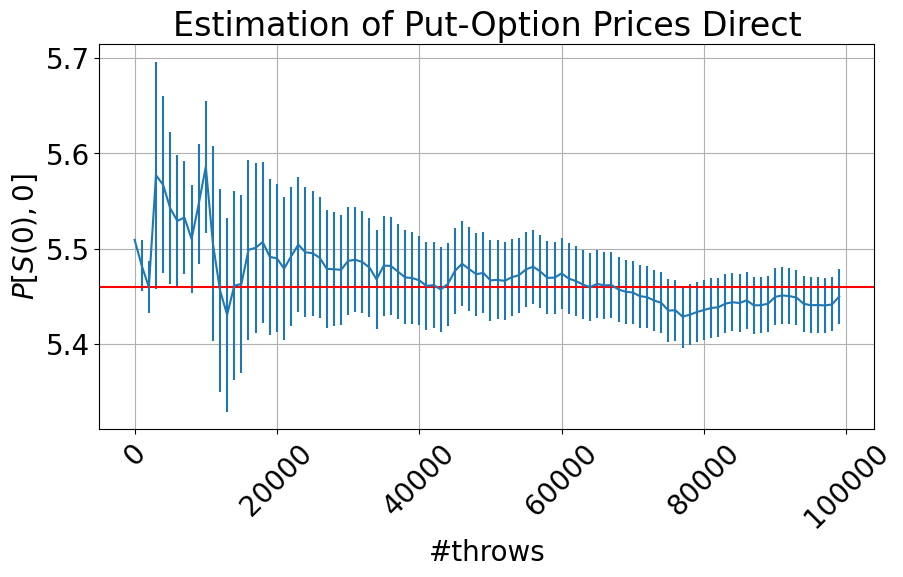

In [17]:
plt.errorbar(x1,data["P_Direct"],yerr=data["err_P_Direct"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=5.4595325819072364, color='r', linestyle='-') #Black-Scholes analytic solution
plt.title('Estimation of Put-Option Prices Direct')
plt.xlabel('#throws')
plt.ylabel('$P[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

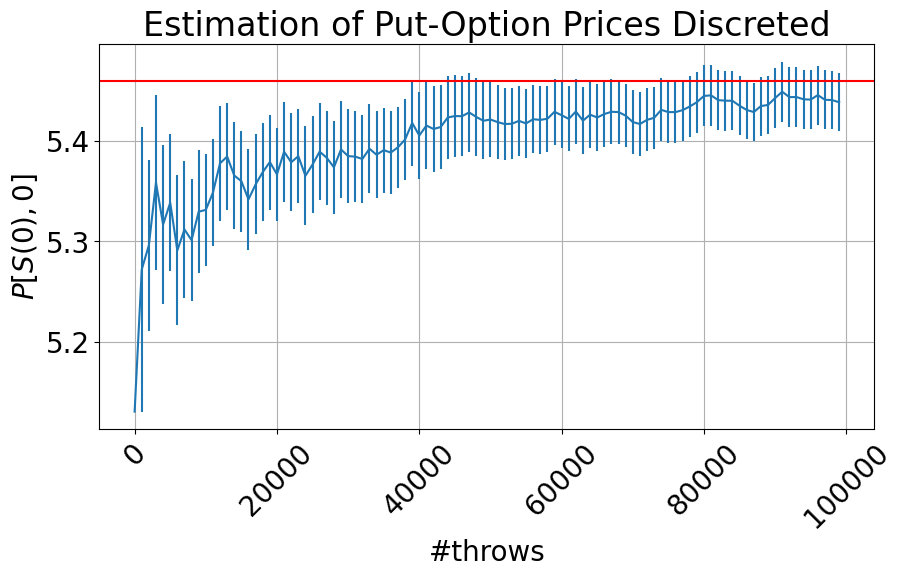

In [18]:
plt.errorbar(x1,data["P_Disc"],yerr=data["err_P_Disc"])
plt.rcParams["figure.figsize"]=(10,5)
plt.axhline(y=5.4595325819072364, color='r', linestyle='-') #Black-Scholes analytic solution
plt.title('Estimation of Put-Option Prices Discreted')
plt.xlabel('#throws')
plt.ylabel('$P[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

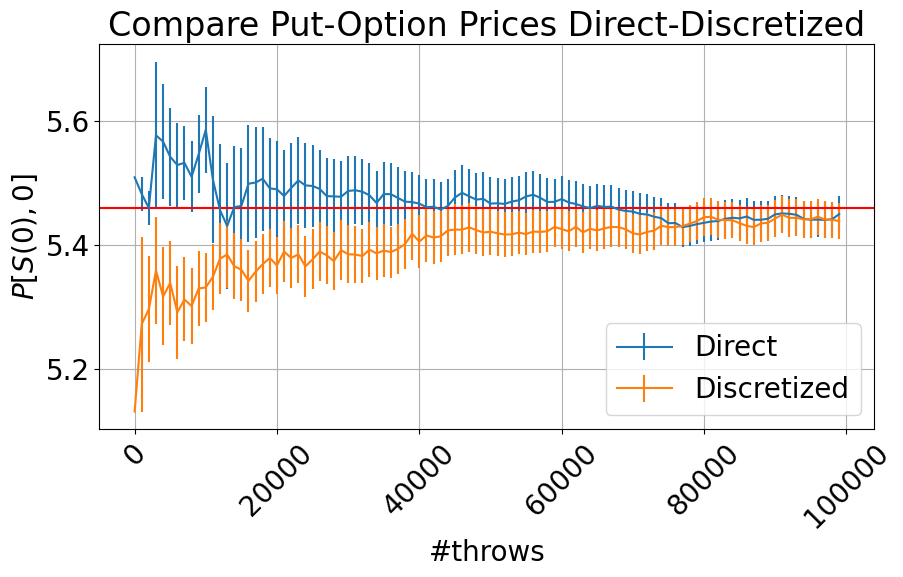

In [19]:
plt.rcParams["figure.figsize"]=(10,5)
plt.errorbar(x1,data["P_Direct"],yerr=data["err_P_Direct"], label="Direct")
plt.errorbar(x1,data["P_Disc"],yerr=data["err_P_Disc"], label="Discretized")
plt.axhline(y=5.4595325819072364, color='r', linestyle='-') #Black-Scholes analytic solution
plt.legend(loc="lower right")
plt.title('Compare Put-Option Prices Direct-Discretized')
plt.xlabel('#throws')
plt.ylabel('$P[S(0),0]$')
plt.xticks(rotation = 45)
plt.grid(True)

### The "goat" of the exercise is to calcolate via Monte Carlo the European call-option price and put-option price, with two stregy, sampling directly the final assect price and sampling discretized path of the asset price. Then compare the results with the theoretical values given at the end of the page. As we can see both call and put in both strategy are statisticly compatible with theoretical values.

In [20]:
plt.rcParams.update({'font.size': 20})
data1 = pd.read_csv("../Esercizio3/datiprice.dat", sep='\t')

Mean price Direct:  110.54508353799937
Std price Direct:  28.10420036574092
Mean price Discret:  110.48359844100045
Std price Discret:  27.962653118435945


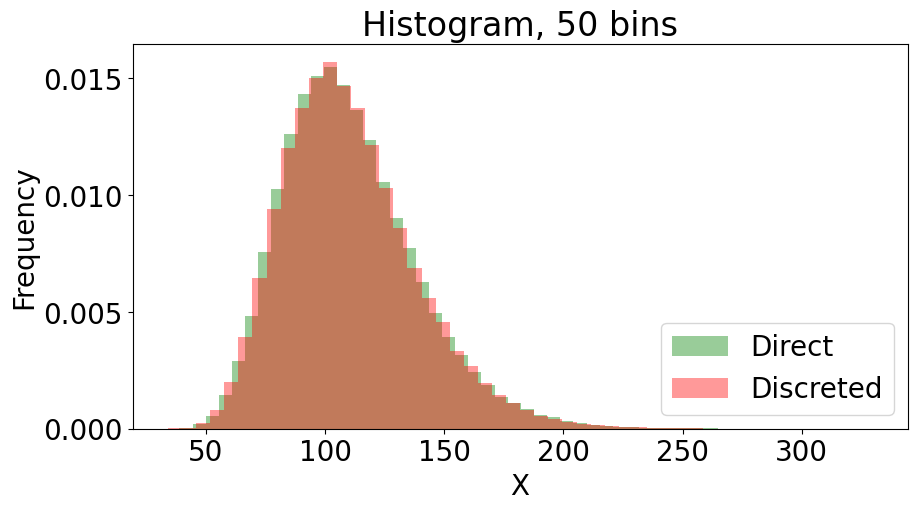

In [21]:
plt.hist(data1["St_Direct"],bins=50, density=True,alpha=0.4, color="green", label="Direct")
plt.hist(data1["St_Discret"],bins=50, density=True,alpha=0.4, color="red", label="Discreted")
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Histogram, 50 bins')
plt.legend(loc="lower right")
mean1=data1["St_Direct"].mean()
std1=data1["St_Direct"].std()
mean2=data1["St_Discret"].mean()
std2=data1["St_Discret"].std()
print("Mean price Direct: ",mean1)
print("Std price Direct: ",std1)
print("Mean price Discret: ",mean2)
print("Std price Discret: ",std2)

### This plot rappresent the frequency of the price in both direct and discret way. 

### For comparison, Black-Scholes analytic solution:

In [12]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


<span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$


By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25


compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>


### Exercise 03.1:
<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>